Dans ces travaux pratiques, nous allons construire un modèle de machine learning de classement de textes et de modélisation de sujet. Nous allons donner à un algorithme une liste de textes et tenterons de créer notre propre algorithme qui trouvera les points communs entre les différents textes et pourra les regrouper. Nous verrons également qu'il existe même des modèles d'apprentissage qui peuvent résumer un texte. La méthode que nous utiliserons est celle de l'apprentissage non supervisé, c'est à dire que le modèle apprendra tout seul à regrouper les textes pour la classification de textes et la modélisation de sujet.

Vous pourrez par la suite utiliser ce code sur votre propre série de document.

Les outils utilisés pour cette scéance est le language de code python , et la librairie Gensim, spécialisé dans le traitement du language naturel non supervisé.

Nous suivrons les étapes suivantes pour construire notre modèle

0.Import des documents

1.Preprocessing

2.Word embbeding

3.Computation & modelling

4.Visualisation


Vous trouverez ci après quelques tutoriels pour aller plus loin sur le sujet:

https://fr.wikipedia.org/wiki/Apprentissage_non_supervis%C3%A9


https://www.youtube.com/watch?v=oBWygCXWWrI



La partie du code ci dessous consiste à importer  les librairies que nous utiliserons pour faire fonctionner le code.
Une librairie est une sorte d'outil informatique qui permet d'executer des actions spécifiques (traiter un textes, extraire des documents pdf...)

In [ ]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
import pandas as pd

In [ ]:
!pip install -q pandas as pd
#!pip install -q os
#!pip install -q re
!pip install -q gensim
!pip install -q matplotlib
!pip install -q pyLDAvis
! pip install -q nltk
! pip install pprint

  Created wheel for pprint: filename=pprint-0.1-cp36-none-any.whl size=1251 sha256=3aef4c8af43a7efce739772b208f667ed999876497fe080ed90ff361d7a490e7
  Stored in directory: /root/.cache/pip/wheels/42/d4/c6/16a6495aecc1bda5d5857bd036efd50617789ba9bea4a05124
Successfully built pprint


La première partie de ce tutoriel consiste à importer les données. Nous avons préparé un corpus de documents contenant des textes de lois relatifs au COVID19.

In [ ]:
# permet de télécharger les documents depuis votre ordinateur dans google collab
#cliquez sur selectionner fichier et selectionnez le fichier qui vous a été envoyé
from google.colab import files
uploaded = files.upload()


Saving Y.csv to Y.csv


In [ ]:
# convertit le fichier excel en un format dit "dataframe"

import io
df2 = pd.read_csv(io.BytesIO(uploaded['Y.csv']))

In [ ]:
df2 = df2.drop(["Unnamed: 0"], axis = 1)

In [ ]:
df2

,final
0,\n \r\n\t\t\tLOI n° 2020-546 du 11 mai 2020 pr...
1,\n \r\n\t\t\tLOI n° 2020-290 du 23 mars 2020 d...
2,\n \r\n\t\t\tOrdonnance n° 2020-599 du 20 mai ...
3,\n \r\n\t\t\tOrdonnance n° 2020-596 du 20 mai ...
4,\n \r\n\t\t\tOrdonnance n° 2020-595 du 20 mai ...
5,\n \r\n\t\t\tOrdonnance n° 2020-562 du 13 mai ...
6,\n \r\n\t\t\tOrdonnance n° 2020-560 du 13 mai ...
7,\n \r\n\t\t\tOrdonnance n° 2020-505 du 2 mai 2...
8,\n \r\n\t\t\tOrdonnance n° 2020-460 du 22 avri...
9,\n \r\n\t\t\tOrdonnance n° 2020-430 du 15 avri...


In [ ]:
# convertit le jeu de données en une liste de liste pour la librairie Gensim

data = df2['final'].values.tolist()

In [ ]:
# affiche le nombre de documents du corpus

print(f"Il y {len(data)} documents dans le corpus.", "\n")

# affiche le 1 document
print(f"Voici un document du corpus:{data[0]}")

Il y 52 documents dans le corpus. 

Voici un document du corpus:
 
			LOI n° 2020-546 du 11 mai 2020 prorogeant l'état d'urgence sanitaire et complétant ses dispositions | Legifrance 
 
 
 Legifrance - Le service public de l'accès au droit 
 
 
 Aller au contenu 
 
 
 Aller à la navigation générale 
 
 
		Découvrez ce document sur le site Légifrance modernisé en version bêta
	 
 https://beta.legifrance.gouv.fr/loda/texte_lc/LEGITEXT000041866165/2020-05-12 
 
	
    
    lundi 6 juillet 2020
 
 Informations de mise à jour 
 
 
 Accueil 
 
 
 Droit français 
 
 
 Droit européen 
 
 
 Droit international 
 
 
 Traductions 
 
 
 Bases de données 
 
 
					Vous êtes dans : 
					


 Accueil > 
 Les autres textes législatifs et réglementaires > 
 LOI n° 2020-546 du 11 mai 2020 prorogeant l'état d'urgence sanitaire et complétant ses dispositions
					 
 
					LOI n° 2020-546 du 11 mai 2020 prorogeant l'état d'urgence sanitaire et complétant ses dispositions
				 Masquer le panneau de navigatio

# 1.Preprocessing

La première étape quand on traite des données de type texte est le préprocessing (pré traitement).
Le texte peut contenir des caractères non voulus, de la ponctuation, des balises html. 
L'enjeu est de retirer ces caractères qui viennent polluer notre textes, pour pouvoir l'intégrer par la suite dans le  modèle.
Cette partie est très importante dans la mesure ou si l'on a des mauvaises données en entrée, on risque d'avoir de mauvais résultats en sortie ("garbage in, garbage out").

In [ ]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [ ]:
# List of stopwords
stopwords = [
    'a', 'à', 'après', 'a', 'aux', 'avec', 'ce', 'ces', 'comme',
    'dans', 'de', 'des', 'd',
    'elle', 'en', 'entre', 'et', 'eux', 'il', 'je', "jusque",
    "jusq", 'la', 'le', 'leur', 'lui', 'lors',
    'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos',
    'notre', 'nous', 'on', 'o', "où", 'par', 'pas', 'pour', 'q', 'que',
    'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi',
    'ton', 't', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j',
    'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés',
    'étant', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai',
    'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait',
    'serions', 'seriez', 'seraient', 'étais', 'était', 'étions',
    'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent',
    'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses',
    'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'e', 'eue',
    'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai',
    'auras', 'aura', 'aurons', 'aurez', 'auront', 'aurais', 'aurait',
    'aurions', 'auriez', 'auraient', 'avais', 'avait', 'avions',
    'aviez', 'avaient', 'eut', 'eûmes', 'eûtes', 'eurent', 'aie',
    'aies', 'ait', 'ayons', 'ayez', 'aient', 'eusse', 'eusses', 'eût',
    'eussions', 'eussiez', 'eussent', 'ceci', 'celà', 'cet', 'cette',
    'ici', 'ils', 'les', 'leurs', 'quel', 'quels', 'quelle',
    'quelles', 'sans', 'soi', "quelque", "quelques", "si",
    "jusq'a", "jusq'à", "jusqu’a", "jusqu’à", "alors", "ça", "fait",
    "faite", "faits", "faites", "q'", "ni", "déjà", "ceux", "celui",
    "celles", "tant", "puis"
    "attendu", "que","qu", "aux" "considérant", "pour", "sur", "un", "une","qui", "du", "au", "aux",
     "article", "code", "2020", "décret", "ou", "loi", "ordonnance", "n°",
]

Le pré processing consiste en plusieurs étapes:
- retirer les stopwords qui n'ont pas de valeurs sémantiques (le, la les, un des, du.....)
- stemming, c'est a tronquer la fin des mots pour ne garder que la racine 

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import FrenchStemmer
import string

def data_preprocessing(data):
    preprocessed_data = list()
    
    # List of stopwords
    stopwords =[
    'a', 'à', 'après', 'a', 'aux', 'avec', 'ce', 'ces', 'comme',
    'dans', 'de', 'des', 'd',
    'elle', 'en', 'entre', 'et', 'eux', 'il', 'je', "jusque",
    "jusq", 'la', 'le', 'leur', 'lui', 'lors',
    'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos',
    'notre', 'nous', 'on', 'o', "où", 'par', 'pas', 'pour', 'q', 'que',
    'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi',
    'ton', 't', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j',
    'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés',
    'étant', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai',
    'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait',
    'serions', 'seriez', 'seraient', 'étais', 'était', 'étions',
    'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent',
    'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses',
    'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'e', 'eue',
    'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai',
    'auras', 'aura', 'aurons', 'aurez', 'auront', 'aurais', 'aurait',
    'aurions', 'auriez', 'auraient', 'avais', 'avait', 'avions',
    'aviez', 'avaient', 'eut', 'eûmes', 'eûtes', 'eurent', 'aie',
    'aies', 'ait', 'ayons', 'ayez', 'aient', 'eusse', 'eusses', 'eût',
    'eussions', 'eussiez', 'eussent', 'ceci', 'celà', 'cet', 'cette',
    'ici', 'ils', 'les', 'leurs', 'quel', 'quels', 'quelle',
    'quelles', 'sans', 'soi', "quelque", "quelques", "si",
    "jusq'a", "jusq'à", "jusqu’a", "jusqu’à", "alors", "ça", "fait",
    "faite", "faits", "faites", "q", "ni", "déjà", "ceux", "celui",
    "celles", "tant", "puis"
    "attendu", "que","qu", "aux" "considérant", "pour", "sur", "un", "une","qui", "du", "au", "aux",
    "article", "code", "2020", "décret", "ou", "loi", "ordonnance", "n°","art", "articles", 'vu', "i", "v","plus"
    ]
   
    
    stemmer = FrenchStemmer()
    
    for doc in data:
    
        # Remove punctuation and lowercase
        punctuation = set(string.punctuation)    
        doc = ''.join([w if w not in punctuation else ' ' for w in doc.lower()])
        
        # Stopword removal
        doc = [w for w in doc.split() if w not in stopwords]  
        
        # Stemming
        #doc = [stemmer.stem(w) for w in doc]
        
        #consider using spacy
        #" ".join([token.lemma_ for token in doc])
        #for word in sentence6:
          #print(word.text,  word.lemma_)
        # lemmatzation spacy

        #nlp = spacy.load('fr_core_news_sm', disable=['parser', 'ner'])
        #sentence = "The striped bats are hanging on their feet for best"
        # Parse the sentence using the loaded 'en' model object `nlp`
        #doc = nlp(sentence)
        # Extract the lemma for each token and join
        #" ".join([token.lemma_ for token in doc])
        
        #your code here
        #doc = [[stemmer.stem(token) for token in sentence] for sentence in doc.str().split()]
        
        # Covenrt list of words to one string
        doc = ' '.join(w for w in doc)
        
        preprocessed_data.append(doc)
        
    return preprocessed_data    

In [ ]:
data_prepro = data_preprocessing(data)

In [ ]:
print(data_prepro [0])

546 11 mai prorogeant état urgence sanitaire complétant dispositions legifrance legifrance service public accès droit aller contenu aller navigation générale découvrez document site légifrance modernisé version bêta https beta legifrance gouv fr loda texte lc legitext000041866165 05 12 lundi 6 juillet informations mise jour accueil droit français droit européen droit international traductions bases données accueil autres textes législatifs réglementaires 546 11 mai prorogeant état urgence sanitaire complétant dispositions 546 11 mai prorogeant état urgence sanitaire complétant dispositions masquer panneau navigation imprimer 546 11 mai prorogeant état urgence sanitaire complétant dispositions 1 assemblée nationale sénat adopté décision conseil constitutionnel 800 dc 11 mai président république promulgue dont teneur suit savoir état urgence sanitaire déclaré 4 290 23 mars urgence faire face épidémie covid 19 prorogé jusqu 10 juillet inclus ii iii créé dispositions suivantes santé publiq

# 2.Word embbeding

Une fois notre texte prétraité, nous allons procéder aux dernières étapes permettant de convertir nos textes en données compréhensibles par l'algorithme.

La première consiste à tokenizer le texte, c'est à dire le découper en unité indivisible.
La seconde consiste à représenter le texte en chiffres, pour que l'algorithme soit en mesure de le traiter.

In [ ]:
texts = data_prepro.copy()

In [ ]:
print(texts[0])

546 11 mai prorogeant état urgence sanitaire complétant dispositions legifrance legifrance service public accès droit aller contenu aller navigation générale découvrez document site légifrance modernisé version bêta https beta legifrance gouv fr loda texte lc legitext000041866165 05 12 lundi 6 juillet informations mise jour accueil droit français droit européen droit international traductions bases données accueil autres textes législatifs réglementaires 546 11 mai prorogeant état urgence sanitaire complétant dispositions 546 11 mai prorogeant état urgence sanitaire complétant dispositions masquer panneau navigation imprimer 546 11 mai prorogeant état urgence sanitaire complétant dispositions 1 assemblée nationale sénat adopté décision conseil constitutionnel 800 dc 11 mai président république promulgue dont teneur suit savoir état urgence sanitaire déclaré 4 290 23 mars urgence faire face épidémie covid 19 prorogé jusqu 10 juillet inclus ii iii créé dispositions suivantes santé publiq

In [ ]:
#texts = [bigram[line] for line in texts]

In [ ]:
len(texts)

52

In [ ]:
texts = [d.split() for d in texts]
#vocab = Dictionary(texts)

In [ ]:
#nous créons un dictionnaire listant tous les tokens(=les mots) de notre texte

dictionary = Dictionary(texts)

In [ ]:
# nous associons aux mots contenus dans le dictionnaires les fréquence d'apparition

corpus_bow = [dictionary.doc2bow(text) for text in texts]

In [ ]:
# visualisons notre corpus converti en chiffres avec la fréquence associée
# c'est sous cette forme que votre texte initial va etre traité par l'algorithme

print(corpus_bow[0])

[(0, 1), (1, 14), (2, 3), (3, 15), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 3), (11, 3), (12, 2), (13, 3), (14, 1), (15, 7), (16, 1), (17, 2), (18, 4), (19, 12), (20, 1), (21, 3), (22, 1), (23, 4), (24, 2), (25, 1), (26, 1), (27, 1), (28, 2), (29, 3), (30, 4), (31, 1), (32, 1), (33, 1), (34, 6), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 3), (47, 5), (48, 5), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 3), (61, 2), (62, 1), (63, 4), (64, 7), (65, 1), (66, 1), (67, 3), (68, 5), (69, 1), (70, 1), (71, 1), (72, 2), (73, 7), (74, 1), (75, 2), (76, 1), (77, 4), (78, 1), (79, 3), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 11), (87, 1), (88, 5), (89, 2), (90, 1), (91, 3), (92, 1), (93, 1), (94, 1), (95, 4), (96, 1), (97, 2), (98, 1), (99, 1), (100, 5), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), (107, 2), (108, 1), (109, 2), (110,

Ci dessus, nous avons converti notre liste de tokens en une suite de chiffres, et avons compté l'occurence de chaque mot dans le corpus. 
Par exemple (1,14) siginifie que le token 1 aparrait 14 fois dans le corpus

C 'est la méthode dite "Bag of Words", où la représentation comprend les mots à chaque fois qu'ils apparaissent et le nombre de fois qu'ils apparaissent.

In [ ]:
# nous voyons qu'à chaque mot a été attribué un chiffre
print(dictionary.token2id)

{'05': 0, '1': 1, '10': 2, '11': 3, '1110': 4, '115': 5, '12': 6, '13': 7, '14': 8, '1411': 9, '15': 10, '16': 11, '17': 12, '18': 13, '182': 14, '19': 15, '1mo': 16, '1°': 17, '2': 18, '2019': 19, '226': 20, '23': 21, '24': 22, '25': 23, '290': 24, '2902': 25, '2905': 26, '2908': 27, '2°': 28, '3': 29, '303': 30, '3113': 31, '3131': 32, '3°': 33, '4': 34, '412': 35, '414': 36, '415': 37, '416': 38, '417': 39, '418': 40, '421': 41, '422': 42, '423': 43, '4622': 44, '4°': 45, '5': 46, '546': 47, '6': 48, '611': 49, '621': 50, '6211': 51, '631': 52, '6327': 53, '641': 54, '67': 55, '7': 56, '71': 57, '711': 58, '72': 59, '73': 60, '74': 61, '774': 62, '8': 63, '800': 64, '85': 65, '86': 66, '9': 67, 'abroge': 68, 'accessibilité': 69, 'accompagnement': 70, 'accord': 71, 'accueil': 72, 'accès': 73, 'accélérée': 74, 'action': 75, 'adapter': 76, 'adoption': 77, 'adopté': 78, 'adresse': 79, 'affaires': 80, 'agence': 81, 'agences': 82, 'agents': 83, 'agissent': 84, 'aide': 85, 'ainsi': 86, 'al

In [ ]:
# voire non pas les numéros attribuées au mots  mais le nombre de fois qu'apparait chaque mot
word_counts = [[(dictionary[id], count) for id, count in line] for line in corpus_bow]
print(len(word_counts))

#nous voyons que le 72e mot ("adapaté") dans le 1e doc apparait une fois
print(word_counts[0][62])

52
('774', 1)


In [ ]:
# fonction qui permet de classer les mots d'un textes par ordre décroissant du nombre d'appartion de ce mot

def Sort_Tuple(tup):  
  
    # reverse = None (Sorts in Ascending order)  
    # key is set to sort using second element of  
    # sublist lambda has been used  
    tup.sort(key = lambda x: x[1], reverse = True)  
    return tup 

# affiche ordre décroissant fréquence d'apparition d'un mot
print(Sort_Tuple(word_counts[15])) 

[('instances', 15), ('mars', 14), ('ministre', 12), ('publics', 11), ('urgence', 11), ('administratives', 10), ('2', 9), ('autorité', 9), ('autorités', 9), ('droit', 9), ('jusqu', 9), ('6', 8), ('pendant', 8), ('savoir', 8), ('13', 7), ('dispositions', 7), ('notamment', 7), ('période', 7), ('établissements', 7), ('organes', 7), ('application', 6), ('mai', 6), ('membres', 6), ('mesures', 6), ('modifié', 6), ('n°2020', 6), ('public', 6), ('sanitaire', 6), ('27', 6), ('indépendantes', 6), ('instance', 6), ('mandats', 6), ('organe', 6), ('560', 6), ('7', 5), ('caractère', 5), ('conditions', 5), ('inclus', 5), ('juillet', 5), ('peut', 5), ('présente', 5), ('président', 5), ('tout', 5), ('état', 5), ('2014', 5), ('30', 5), ('applicable', 5), ('applicables', 5), ('collégiales', 5), ('juin', 5), ('nonobstant', 5), ('tard', 5), ('toute', 5), ('susvisée', 5), ('15', 4), ('2019', 4), ('4', 4), ('adoption', 4), ('compris', 4), ('conseil', 4), ('fonctionnement', 4), ('général', 4), ('mentionnées', 

In [ ]:
print(f"Il y {len(dictionary)} mots dans notre corpus")
print(f"Notre corpus contient {len(corpus_bow)} documents")

Il y 5714 mots dans notre corpus
Notre corpus contient 52 documents


#different embeddings
**TF - IDF**

Le TF-IDF (de l'anglais term frequency-inverse document frequency) permet d'évaluer l'importance d'un terme contenu dans un document, relativement à une collection ou un corpus. Le poids augmente proportionnellement au nombre d'occurrences du mot dans le document. Il varie également en fonction de la fréquence du mot dans le corpus. Des variantes de la formule originale sont souvent utilisées dans des moteurs de recherche pour apprécier la pertinence d'un document en fonction des critères de recherche de l'utilisateur.


Calcul de TF
TF(t) = Nombre d'apparition du terme t dans le document / Nombre total de termes dans le document

Calcul de IDF
IDF = log(Nombre total de documents / Nombre de documents contenant le terme analysé)

Calcul de TFIDF:
TFIDF = TF(t).IDF


In [ ]:
from gensim import models
import numpy as np
tfidfmodel = models.TfidfModel(corpus_bow, smartirs='ntc')

In [ ]:
# visualiser notre entier coprus et les poids TFIDF associé à chaque mot
for doc in tfidfmodel[corpus_bow]:
    print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

[['05', 0.02], ['1', 0.01], ['10', 0.01], ['11', 0.02], ['1110', 0.03], ['115', 0.03], ['12', 0.0], ['13', 0.0], ['14', 0.01], ['1411', 0.02], ['15', 0.01], ['16', 0.02], ['17', 0.01], ['18', 0.02], ['182', 0.03], ['19', 0.0], ['1°', 0.01], ['2', 0.0], ['2019', 0.1], ['226', 0.03], ['23', 0.0], ['24', 0.01], ['25', 0.0], ['290', 0.0], ['2902', 0.03], ['2905', 0.03], ['2908', 0.03], ['2°', 0.01], ['3', 0.01], ['303', 0.11], ['3113', 0.03], ['3131', 0.01], ['3°', 0.0], ['4', 0.01], ['412', 0.03], ['414', 0.02], ['415', 0.03], ['416', 0.03], ['417', 0.07], ['418', 0.03], ['421', 0.02], ['422', 0.03], ['423', 0.02], ['4622', 0.03], ['4°', 0.01], ['5', 0.01], ['546', 0.07], ['611', 0.03], ['621', 0.02], ['6211', 0.03], ['631', 0.03], ['6327', 0.07], ['641', 0.02], ['67', 0.03], ['7', 0.0], ['71', 0.02], ['711', 0.03], ['72', 0.01], ['73', 0.05], ['74', 0.04], ['774', 0.03], ['8', 0.01], ['800', 0.17], ['85', 0.03], ['86', 0.02], ['9', 0.01], ['abroge', 0.08], ['accompagnement', 0.01], ['acc

In [ ]:
# permet de visualiser la traduction en chiffre d'un document de notre corpus. C'est sous ce format que nos textes vont être traité par l'algorithme
vector = tfidfmodel[corpus_bow[0]]
vector

[(0, 0.021656899227303694), (1, 0.014492530145315511), (2, 0.007287046390759228), (3, 0.015527710869980905), (4, 0.033361940182913684), (5, 0.027509419705108687), (6, 0.0016046145880281497), (7, 0.0026483369444488445), (8, 0.010453594114989829), (9, 0.024085914690890102), (10, 0.01310221447592562), (11, 0.015680391172484744), (12, 0.008734809650617079), (13, 0.018551030208826872), (14, 0.033361940182913684), (15, 0.0035121509030729033), (17, 0.005747015364800193), (18, 0.002703331118680459), (19, 0.10201028906704611), (20, 0.027509419705108687), (21, 0.004231514512988473), (22, 0.008500857422253842), (23, 0.004883029902189945), (24, 0.0036065840865526547), (25, 0.033361940182913684), (26, 0.033361940182913684), (27, 0.033361940182913684), (28, 0.005296673888897689), (29, 0.006020272094943423), (30, 0.11003767882043475), (31, 0.033361940182913684), (32, 0.013115545793272818), (33, 0.0038395203012492334), (34, 0.0051215710960978295), (35, 0.027509419705108687), (36, 0.024085914690890102)

On apercoit que la transformation du texte avec le modèle Bag of word et le modèle TFIDF est complétement différente

# Text summarisation

In [ ]:
from gensim.summarization import summarize
# resume le texte en fonction d'un ratio à 0.1 du nombre de mode du texte initial
print("résumé d'un texte","\n", summarize(data[20], split=False, ratio=0.1), "\n")


résumé d'un texte 
 Ordonnance n° 2020-320 du 25 mars 2020 relative à l'adaptation des délais et des procédures applicables à l'implantation ou la modification d'une installation de communications électroniques afin d'assurer le fonctionnement des services et des réseaux de communications électroniques | Legifrance 
Aller à la navigation générale 
Ordonnance n° 2020-320 du 25 mars 2020 relative à l'adaptation des délais et des procédures applicables à l'implantation ou la modification d'une installation de communications électroniques afin d'assurer le fonctionnement des services et des réseaux de communications électroniques 
Ordonnance n° 2020-320 du 25 mars 2020 relative à l'adaptation des délais et des procédures applicables à l'implantation ou la modification d'une installation de communications électroniques afin d'assurer le fonctionnement des services et des réseaux de communications électroniques 
34-9-1 du code des postes et des communications électroniques , l'obligation de 

In [ ]:
# exercice: essayer d'afficher le résumé d'un des textes avec différent ratio. que constatez vous?





# 3.Computation & modelling


# TF-IDF

In [ ]:
from gensim.models import TfidfModel
tfidfmodel = TfidfModel(corpus_bow, normalize=True)

In [ ]:
vector = tfidfmodel[corpus_bow[7]]
vector

[(1, 0.008398006691458728), (3, 0.002099501672864682), (6, 0.0130175956008343), (8, 0.010600727877233072), (11, 0.010600727877233072), (13, 0.025082846584999017), (15, 0.008140763963138042), (18, 0.010965521421993907), (21, 0.00286071523135638), (23, 0.004951758279507104), (24, 0.0036573465592164996), (34, 0.001731218975866663), (46, 0.013478559037435866), (67, 0.012594195246081488), (71, 0.0172410130458863), (75, 0.022447010136664492), (88, 0.007314693118432999), (95, 0.0016626236373448089), (103, 0.13401986366155527), (133, 0.022447010136664492), (137, 0.004492853012478622), (140, 0.030036675149656897), (144, 0.01396929043617276), (154, 0.029461007989328915), (163, 0.015574245353295765), (167, 0.001731218975866663), (169, 0.003254398900208575), (174, 0.00650879780041715), (178, 0.007787122676647882), (185, 0.3347593592939887), (188, 0.013849751806933304), (195, 0.028232430539094775), (207, 0.0006650494549379235), (212, 0.054236075151567045), (234, 0.00033252472746896175), (240, 0.008

## LSI model (Latent Semantic Indexing)

L'indexation sémantique Latente est un procédé de traitement des langues naturelles, dans le cadre de la sémantique vectorielle. La LSA fut brevetée en 19881 et publiée en 19902.

Elle permet d'établir des relations entre un ensemble de documents et les termes qu'ils contiennent, en construisant des « concepts » liés aux documents et aux termes.

In [ ]:
from gensim.models import LsiModel
lsimodel = LsiModel(corpus=corpus_bow, num_topics=10, id2word=dictionary)

In [ ]:
#applique le modèle LSI à notre corpus pour montrer quelles sont les mots les plus importants pour chaque num_topic
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics

[(0, '0.228*"santé" + 0.213*"établissements" + 0.210*"1" + 0.189*"dispositions" + 0.181*"n°2020" + 0.156*"mai" + 0.151*"présent" + 0.143*"savoir" + 0.140*"mentionnés" + 0.132*"11"'), (1, '0.252*"mars" + -0.160*"établissements" + 0.133*"premier" + 0.133*"ministre" + 0.131*"date" + 0.130*"délais" + 0.130*"travail" + 0.125*"alinéa" + -0.124*"détail" + 0.123*"droit"'), (2, '0.247*"conseillers" + 0.237*"collectivités" + 0.227*"tour" + 0.216*"territoriales" + 0.191*"général" + 0.143*"conseil" + -0.125*"savoir" + 0.123*"second" + 0.119*"premier" + -0.113*"dispositions"'), (3, '-0.217*"fonction" + 0.215*"travail" + -0.203*"publique" + 0.172*"procédure" + -0.161*"accès" + -0.143*"22" + 0.140*"pénale" + -0.137*"données" + -0.132*"concours" + -0.130*"janvier"'), (4, '-0.467*"travail" + 0.191*"procédure" + -0.187*"activité" + 0.177*"pénale" + 0.170*"peut" + -0.155*"partielle" + 0.145*"juge" + -0.136*"sociale" + 0.134*"président" + -0.131*"ministre"')]

## HDP

In [ ]:
from gensim.models import  HdpModel
hdpmodel = HdpModel(corpus=corpus_bow, id2word=dictionary)

In [ ]:
hdpmodel.show_topics(num_topics=10, num_words=10, log=False, formatted=False)

[(0, [('santé', 0.010356246130547956), ('établissements', 0.008358379376606042), ('n°2020', 0.007275333793624137), ('1', 0.0070663015611441195), ('dispositions', 0.006633675573645155), ('mai', 0.00663026365547518), ('r', 0.005792366503919433), ('11', 0.00539211301382534), ('détail', 0.005280870197781177), ('présent', 0.004938272630947366)]), (1, [('établissements', 0.00869029559349273), ('1', 0.007739288357845378), ('santé', 0.007182109210718876), ('personnes', 0.006403458334040931), ('présent', 0.006138275711285119), ('n°2020', 0.006077701823021887), ('application', 0.005922415727134948), ('mai', 0.0056533168146887264), ('mentionnés', 0.005651555583705275), ('dispositions', 0.005605760500859942)]), (2, [('mars', 0.009308728916670214), ('dispositions', 0.008899883530218035), ('1', 0.0071474335692661255), ('savoir', 0.00642522953369215), ('ministre', 0.006270995798943697), ('procédure', 0.006263710915585436), ('santé', 0.006126572710964932), ('alinéa', 0.0050490690492482415), ('pénale',

## LDA

L'allocation de Dirichlet latente (LDA) Amazon SageMaker est un algorithme d'apprentissage non supervisé qui tente de décrire un ensemble d'observations sous la forme d'une combinaison de catégories distinctes. Le modèle LDA est plus couramment utilisé pour découvrir un certain nombre de rubriques partagées par les documents au sein d'un corpus de texte (ce nombre est spécifié par l'utilisateur). Ici, chaque observation est un document, les fonctions sont la présence (ou nombre d'occurrences) de chaque mot, et les catégories sont les rubriques. Étant donné que la méthode n'est pas supervisée, les rubriques ne sont pas spécifiées à l'avance et leur alignement avec la façon dont les humains peuvent naturellement classer les documents n'est pas garanti. Les rubriques sont apprises sous la forme d'une distribution de probabilité sur les mots rencontrés dans chaque document. Chaque document est à son tour décrit comme un mélange de rubriques.

https://fr.wikipedia.org/wiki/Allocation_de_Dirichlet_latente

In [ ]:
from gensim.models import  LdaModel
ldamodel = LdaModel(corpus=corpus_bow, num_topics=7, id2word=dictionary, alpha='auto', eval_every=5,chunksize = 100, update_every=1, passes =4)

In [ ]:
print(ldamodel.show_topics(num_topics = 7, log=False, formatted=False))

[(0, [('santé', 0.011709216), ('1', 0.009553129), ('personnes', 0.008451411), ('établissements', 0.007255457), ('dispositions', 0.0062582516), ('savoir', 0.0060573816), ('mai', 0.0058832383), ('11', 0.005744613), ('sociale', 0.0053606583), ('présent', 0.0052493587)]), (1, [('ministre', 0.008400075), ('savoir', 0.00804463), ('titre', 0.0076468517), ('travail', 0.006728259), ('1', 0.0066178557), ('éducation', 0.005759215), ('premier', 0.005525863), ('dispositions', 0.0053556124), ('alinéa', 0.0052565355), ('ii', 0.0049214726)]), (2, [('santé', 0.009166416), ('établissements', 0.008656206), ('n°2020', 0.0076508666), ('dispositions', 0.007063903), ('1', 0.0070379893), ('mai', 0.006255167), ('r', 0.005915555), ('ministre', 0.005707161), ('présent', 0.0056741354), ('11', 0.005313684)]), (3, [('savoir', 0.0108663505), ('mars', 0.009488502), ('dispositions', 0.0078276945), ('peut', 0.007654276), ('ministre', 0.0074498737), ('droit', 0.006987674), ('application', 0.0058891806), ('premier', 0.00

# 4.Visualisation

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus_bow, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.126772 -0.022714       1        1  29.755705
3     -0.092884 -0.047182       2        1  18.619862
5     -0.039071 -0.027176       3        1  15.701776
4     -0.038098 -0.048179       4        1  13.917597
0      0.063735 -0.011730       5        1  12.970418
1      0.010540  0.029200       6        1   4.546518
6     -0.030994  0.127781       7        1   4.488130, topic_info=            Term        Freq       Total Category  logprob  loglift
625      travail  352.000000  352.000000  Default  30.0000  30.0000
781     activité  146.000000  146.000000  Default  29.0000  29.0000
95   application  443.000000  443.000000  Default  28.0000  28.0000
367         mars  595.000000  595.000000  Default  27.0000  27.0000
379     ministre  582.000000  582.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
470      premier   15.090761  332.880768   Topic7  -5.5030   0.0100
362          mai   15.066263  401.465942   Topic7  -5.5047  -0.1789
413    notamment   14.751721  273.278931   Topic7  -5.5258   0.1846
564       savoir   14.819743  539.612976   Topic7  -5.5212  -0.4912
562        santé   14.673968  479.183960   Topic7  -5.5310  -0.3823

[578 rows x 6 columns], token_table=      Topic      Freq Term
term                      
3923      1  0.794539    0
3923      3  0.030559    0
3923      4  0.030559    0
3923      5  0.122237    0
3923      6  0.030559    0
...     ...       ...  ...
4772      1  0.778749    €
4772      3  0.026853    €
4772      4  0.026853    €
4772      5  0.134267    €
4772      6  0.026853    €

[1755 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 6, 5, 1, 2, 7])

Comment interpreter ce graphique ?

Chaque bulle sur la gauche représente un sujet. plus la bulle est grande, plus important est le sujet. Un Bon modèle est celui qui dispose de grande bulles, qui ne se recoupent pas et disposée dans les 4 différentes zones du graphique.
Un mauvais modèles aura de petites bulles regroupées dans une même partie du graphique


Dans ce graphique, nous pouvons visualiser les 10 sujets qu'a retenu notre dernier algorithme LDA. En cliquant sur les bulles nous pouvons voir la représentation du nombre de mots par sujets.

On constate que certains cercles se recoupent.


Essayez de changer le nombre de sujets (num_topics) pour voir si les résultats vous semblent plus pertinents.

Quelle interprétation de ces graphiques pouvez vous faire ?

Que constatez vous concernant les mots retenus par sujets ?

Quelles methodes pouvons nous uliliser pour avoir des sujets plus pertinents ?



# 4.Model evaluation and Metrics

Dans cette partie, nous allons tenter d'évaluer les resultats de nos algorihtme.
il peut être difficile d'évaluer un modèle sur des données de type textes car elles sont essentiellement qualitative

## topic coherence

In [ ]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [ ]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

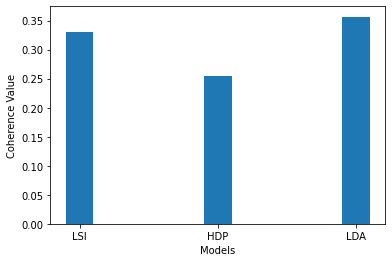

In [ ]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])

Vous pouvez observer ci dessus les mesures de cohérence de chaque modèle d'algorithme utilisé.
Comparez ces résultats avec la partie show_topics. 

Les resultats des modèles vous semblent ils pertinents ? 

Quelles critiques pouvez vous formuler sur ces résultats ?

Utiliseriez cette algorithme pour votre propre site ? 

# tentative d'amélioration des performances du modèles

Utilisation de la méthodes TF IDF avec le modèles LDA, LSI et HDP



In [ ]:
from gensim.models import  LdaModel
ldamodel_tf = LdaModel(corpus=tfidfmodel[corpus_bow], num_topics=6, id2word=dictionary)

In [ ]:
print(ldamodel_tf.show_topics(5))

[(1, '0.001*"crée" + 0.001*"4722" + 0.001*"transports" + 0.001*"communications" + 0.001*"151" + 0.001*"165" + 0.001*"travail" + 0.001*"l5533" + 0.001*"modifie" + 0.001*"électroniques"'), (2, '0.001*"environnement" + 0.001*"collectivités" + 0.001*"fonds" + 0.001*"territoriales" + 0.000*"visant" + 0.000*"181" + 0.000*"fournisseurs" + 0.000*"factures" + 0.000*"électricité" + 0.000*"locaux"'), (0, '0.001*"travail" + 0.001*"371" + 0.001*"conseillers" + 0.001*"candidats" + 0.001*"livret" + 0.001*"tour" + 0.001*"éducation" + 0.001*"repos" + 0.001*"notes" + 0.001*"scolaire"'), (4, '0.001*"304" + 0.001*"modifie" + 0.001*"exceptionnelle" + 0.001*"avocat" + 0.001*"595" + 0.001*"conseillers" + 0.001*"avance" + 0.001*"n°2020" + 0.000*"tour" + 0.000*"syndic"'), (5, '0.001*"2314" + 0.001*"2313" + 0.001*"congés" + 0.001*"annuels" + 0.001*"assemblées" + 0.000*"publique" + 0.000*"pénale" + 0.000*"temps" + 0.000*"voies" + 0.000*"fonction"')]


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel_tf, tfidfmodel[corpus_bow], dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.004969  0.000565       1        1  38.180908
4     -0.000194 -0.003685       2        1  16.316200
5     -0.000958 -0.000444       3        1  14.247590
3     -0.001660  0.000361       4        1  13.635283
1     -0.000931  0.001964       5        1   9.262160
2     -0.001227  0.001239       6        1   8.357863, topic_info=                Term      Freq     Total Category  logprob  loglift
189             crée  0.000000  0.000000  Default  30.0000  30.0000
1970             304  0.000000  0.000000  Default  29.0000  29.0000
5329            4722  0.000000  0.000000  Default  28.0000  28.0000
5270             151  0.000000  0.000000  Default  27.0000  27.0000
2023  communications  0.000000  0.000000  Default  26.0000  26.0000
...              ...       ...       ...      ...      ...      ...
1361        paiement  0.021014  0.140936   Topic6  -7.8256   0.5789
487      propagation  0.023449  0.191362   Topic6  -7.7160   0.3826
804            aides  0.021300  0.154962   Topic6  -7.8121   0.4975
1069      délibérant  0.021624  0.164530   Topic6  -7.7970   0.4527
2087      solidarité  0.021631  0.194166   Topic6  -7.7967   0.2874

[278 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 6, 4, 2, 3])

In [ ]:
# vous pouvez visualisez vos différent model en modifiant le num_topics

mon_model = LdaModel(corpus=tfidfmodel[corpus_bow], num_topics=6, id2word=dictionary)

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(mon_model, tfidfmodel[corpus_bow], dictionary)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.005439  0.000185       1        1  38.747673
3     -0.001419 -0.003225       2        1  14.904136
4     -0.000768 -0.000916       3        1  14.080704
0     -0.000107  0.000140       4        1  11.220620
1     -0.002149  0.002137       5        1  10.927027
2     -0.000997  0.001679       6        1  10.119845, topic_info=                Term      Freq     Total Category  logprob  loglift
5057             371  0.000000  0.000000  Default  30.0000  30.0000
5329            4722  0.000000  0.000000  Default  29.0000  29.0000
2023  communications  0.000000  0.000000  Default  28.0000  28.0000
2617            2314  0.000000  0.000000  Default  27.0000  27.0000
2616            2313  0.000000  0.000000  Default  26.0000  26.0000
...              ...       ...       ...      ...      ...      ...
514         publique  0.026711  0.213129   Topic6  -7.7770   0.2139
5009          livret  0.024357  0.180086   Topic6  -7.8692   0.2901
416           n°2020  0.025801  0.238118   Topic6  -7.8117   0.0683
625          travail  0.027625  0.371271   Topic6  -7.7433  -0.3075
1686       éducation  0.024100  0.190149   Topic6  -7.8798   0.2251

[291 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 5, 1, 2, 3])

In [ ]:
lsimodel_tf = LsiModel(corpus=tfidfmodel[corpus_bow], num_topics=6, id2word=dictionary)
hdpmodel_tf = HdpModel(corpus=tfidfmodel[corpus_bow], id2word=dictionary)
ldamodel_tf = LdaModel(corpus=tfidfmodel[corpus_bow], num_topics=6, id2word=dictionary)

mon_model = LdaModel(corpus=tfidfmodel[corpus_bow], num_topics=6, id2word=dictionary)


In [ ]:
lda_tfidf_topics = [[word for word, prob in topic] for topicid, topic in ldamodel_tf.show_topics(formatted=False)]

hdp_tfidf_topics = [[word for word, prob in topic] for topicid, topic in hdpmodel_tf.show_topics(formatted=False)]

lsi_tfidf_topics = [[word for word, prob in topic] for topicid, topic in lsimodel_tf.show_topics(formatted=False)]

mon_model_topics = [[word for word, prob in topic] for topicid, topic in mon_model.show_topics(formatted=False)]






In [ ]:
from gensim.models.coherencemodel import CoherenceModel

lda_tfidf_coherence = CoherenceModel(topics=lda_tfidf_topics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_tfidf_coherence = CoherenceModel(topics=hdp_tfidf_topics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lsi_tfidf_coherence = CoherenceModel(topics=lsi_tfidf_topics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

mon_model_coherence = CoherenceModel(topics=mon_model_topics , texts=texts, dictionary=dictionary, window_size=10).get_coherence()







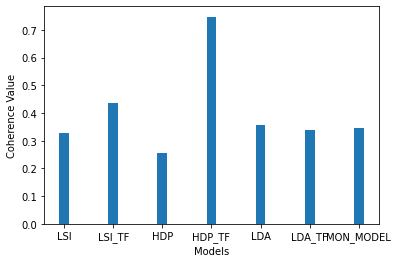

In [ ]:
evaluate_bar_graph([lsi_coherence, lsi_tfidf_coherence, hdp_coherence, hdp_tfidf_coherence, lda_coherence, lda_tfidf_coherence, mon_model_coherence],
                   ['LSI','LSI_TF', 'HDP','HDP_TF', 'LDA', 'LDA_TF', 'MON_MODEL'])

In [ ]:
print(mon_model.show_topics(5))

[(0, '0.001*"conseillers" + 0.001*"congés" + 0.001*"336" + 0.001*"jours" + 0.001*"travail" + 0.001*"tour" + 0.001*"avocat" + 0.001*"2019" + 0.001*"annuels" + 0.001*"environnement"'), (3, '0.001*"travail" + 0.001*"4722" + 0.001*"communications" + 0.001*"165" + 0.001*"2314" + 0.001*"2313" + 0.001*"détail" + 0.001*"306" + 0.001*"repos" + 0.001*"électroniques"'), (4, '0.001*"304" + 0.001*"modifie" + 0.001*"travail" + 0.001*"assemblées" + 0.001*"assemblée" + 0.000*"sociaux" + 0.000*"visant" + 0.000*"312" + 0.000*"médecin" + 0.000*"organe"'), (5, '0.001*"travail" + 0.001*"instances" + 0.000*"4624" + 0.000*"visite" + 0.000*"travailleurs" + 0.000*"717" + 0.000*"visites" + 0.000*"371" + 0.000*"adaptant" + 0.000*"électricité"'), (1, '0.001*"conseillers" + 0.001*"modifie" + 0.001*"151" + 0.001*"tour" + 0.001*"candidats" + 0.001*"audience" + 0.001*"2016" + 0.001*"n°2016" + 0.000*"communautaires" + 0.000*"municipaux"')]


In [ ]:
print(hdpmodel_tf.show_topics(5))

[(0, '0.002*spécificités + 0.001*assimilés + 0.001*647 + 0.001*domaine + 0.001*élevées + 0.001*dernier + 0.001*5° + 0.001*client + 0.001*mémoires + 0.001*progrès'), (1, '0.002*répertoire + 0.001*modifiés + 0.001*signature + 0.001*conduite + 0.001*indéterminée + 0.001*5141 + 0.001*hypermarchés + 0.001*pharmacovigilance + 0.001*organe + 0.001*déposer'), (2, '0.001*voirie + 0.001*réunissant + 0.001*distinct + 0.001*mensuelle + 0.001*isère + 0.001*663 + 0.001*vulnérabilité + 0.001*financières + 0.001*quelconque + 0.001*détermination'), (3, '0.002*contractuellement + 0.001*376 + 0.001*guévenoux + 0.001*directs + 0.001*1639 + 0.001*290 + 0.001*établir + 0.001*524 + 0.001*opposé + 0.001*permet'), (4, '0.001*25 + 0.001*rester + 0.001*étendre + 0.001*texte + 0.001*mètres + 0.001*161 + 0.001*délégations + 0.001*tarification + 0.001*législatives + 0.001*différée'), (5, '0.001*chapitre + 0.001*effectivement + 0.001*morale + 0.001*couverts + 0.001*interrompre + 0.001*1099 + 0.001*correcteur + 0.001